In [1]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_Yix80N0.csv

--2020-04-13 07:59:27--  https://datahack-prod.s3.amazonaws.com/test_file/test_Yix80N0.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.36
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 465312 (454K) [text/csv]
Saving to: ‘test_Yix80N0.csv’

test_Yix80N0.csv    100%[===================>] 454.41K   872KB/s    in 0.5s    

2020-04-13 07:59:28 (872 KB/s) - ‘test_Yix80N0.csv’ saved [465312/465312]



In [2]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_8wry4cB.csv

--2020-04-13 07:59:34--  https://datahack-prod.s3.amazonaws.com/train_file/train_8wry4cB.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.64
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1138290 (1.1M) [text/csv]
Saving to: ‘train_8wry4cB.csv’

train_8wry4cB.csv   100%[===================>]   1.08M  1.64MB/s    in 0.7s    

2020-04-13 07:59:35 (1.64 MB/s) - ‘train_8wry4cB.csv’ saved [1138290/1138290]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
train = pd.read_csv('train_8wry4cB.csv')
test = pd.read_csv('test_Yix80N0.csv')

In [5]:
train.head(5)

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [6]:
test.head(5)

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [7]:
train.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

In [0]:
train['startTime'] = pd.to_datetime(train['startTime'])
train['day'] = train['startTime'].dt.day
train['weekofyear'] = train['startTime'].dt.weekofyear
train['month'] = train['startTime'].dt.month
train['dayofweek'] = train['startTime'].dt.dayofweek
train['weekend'] = (train['startTime'].dt.weekday >=5).astype(int)
train['hour'] = train['startTime'].dt.hour
train['minute'] = train['startTime'].dt.minute

In [0]:
test['startTime'] = pd.to_datetime(test['startTime'])
test['day'] = test['startTime'].dt.day
test['weekofyear'] = test['startTime'].dt.weekofyear
test['month'] = test['startTime'].dt.month
test['dayofweek'] = test['startTime'].dt.dayofweek
test['weekend'] = (test['startTime'].dt.weekday >=5).astype(int)
test['hour'] = test['startTime'].dt.hour
test['minute'] = test['startTime'].dt.minute

In [0]:
del train['startTime']
del test['startTime']

In [0]:
train['endTime'] = pd.to_datetime(train['endTime'])
train['eday'] = train['endTime'].dt.day
train['eweekofyear'] = train['endTime'].dt.weekofyear
train['emonth'] = train['endTime'].dt.month
train['edayofweek'] = train['endTime'].dt.dayofweek
train['eweekend'] = (train['endTime'].dt.weekday >=5).astype(int)
train['ehour'] = train['endTime'].dt.hour
train['eminute'] = train['endTime'].dt.minute

In [0]:
test['endTime'] = pd.to_datetime(test['endTime'])
test['eday'] = test['endTime'].dt.day
test['eweekofyear'] = test['endTime'].dt.weekofyear
test['emonth'] = test['endTime'].dt.month
test['edayofweek'] = test['endTime'].dt.dayofweek
test['eweekend'] = (test['endTime'].dt.weekday >=5).astype(int)
test['ehour'] = test['endTime'].dt.hour
test['eminute'] = test['endTime'].dt.minute

In [0]:
del train['endTime']
del test['endTime']

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
print('Percentage of each class in Target Variable \n')
print((train.gender.value_counts()/len(train))*100)

Percentage of each class in Target Variable 

female    78.019048
male      21.980952
Name: gender, dtype: float64


In [0]:
d=[]
tl=[]
import re
for i in train['ProductList']:
  j=re.sub(r'[^\w]', '', i)
  tl.append(j)
  m=len(j)
  d.append(m)
train['leng']=d

In [0]:
d=[]
tll=[]
import re
for i in test['ProductList']:
  j=re.sub(r'[^\w]', '', i)
  tll.append(j)
  m=len(j)
  d.append(m)
test['leng']=d

In [0]:
train['str']=tl
test['str']=tll

In [0]:
train['session_id']=train.session_id.str.extract('(\d+)')
test['session_id']=test.session_id.str.extract('(\d+)')

In [0]:
loc = np.append(train['str'].values, test['str'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['str']=l.transform(train['str'])
test['str']=l.transform(test['str'])

In [0]:
del train['ProductList']
del test['ProductList']

In [0]:
train_df=train

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['gender'] = le.fit_transform(train_df['gender'])
le.classes_

array(['female', 'male'], dtype=object)

In [0]:
X = train_df.drop(labels=['gender'], axis=1)
y = train_df['gender'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [26]:
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score

In [28]:
!pip install catboost

     |████████████████████████████████| 64.4MB 65kB/s 


In [29]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=10,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.01,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=500)
cat.fit(X_train, y_train, verbose=100,
        use_best_model=True,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

0:	learn: 0.8637460	test: 0.8637460	test1: 0.8697143	best: 0.8697143 (0)	total: 90.7ms	remaining: 1m 30s
100:	learn: 0.8643810	test: 0.8643810	test1: 0.8689524	best: 0.8697143 (0)	total: 2.91s	remaining: 25.9s
200:	learn: 0.8662857	test: 0.8662857	test1: 0.8685714	best: 0.8697143 (0)	total: 5.85s	remaining: 23.3s
300:	learn: 0.8706032	test: 0.8706032	test1: 0.8693333	best: 0.8697143 (0)	total: 8.91s	remaining: 20.7s
400:	learn: 0.8773333	test: 0.8773333	test1: 0.8700952	best: 0.8700952 (327)	total: 11.9s	remaining: 17.8s
500:	learn: 0.8846984	test: 0.8846984	test1: 0.8712381	best: 0.8712381 (460)	total: 15s	remaining: 14.9s
600:	learn: 0.8896508	test: 0.8896508	test1: 0.8712381	best: 0.8720000 (576)	total: 18s	remaining: 12s
700:	learn: 0.8933333	test: 0.8933333	test1: 0.8723810	best: 0.8723810 (698)	total: 21.1s	remaining: 8.98s
800:	learn: 0.8979048	test: 0.8979048	test1: 0.8727619	best: 0.8735238 (747)	total: 24.1s	remaining: 5.99s
900:	learn: 0.9013333	test: 0.9013333	test1: 0.8735

In [34]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.952


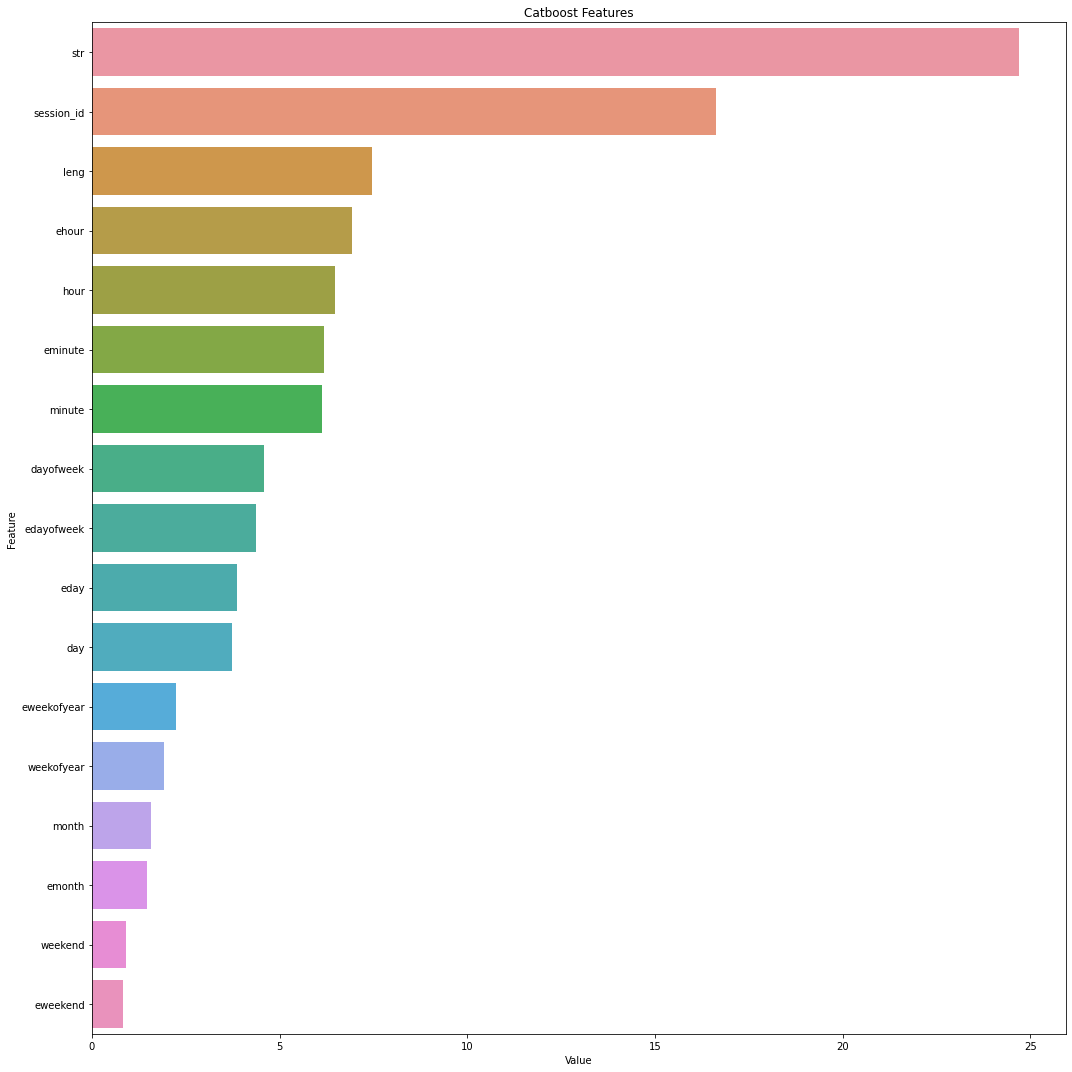

In [35]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [33]:
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=10,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.1,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Accuracy:  0.8704761904761905
Accuracy:  0.8952380952380953
Accuracy:  0.8980952380952381
Accuracy:  0.8733333333333333
Accuracy:  0.8819047619047619
Accuracy:  0.8771428571428571
Accuracy:  0.8733333333333333
Accuracy:  0.8742857142857143
Accuracy:  0.8914285714285715
Accuracy:  0.8838095238095238


In [36]:
np.mean(errcat,0)

0.881904761904762

In [37]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [0]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=cat_final, columns=['gender'])
df_sub.head()

In [0]:
df_sub['gender'].value_counts()

In [0]:
df_sub.to_csv('ensemble.csv', index=False)

In [0]:
from google.colab import files
files.download('ensemble.csv')

# 2nd Method

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.2, n_estimators=1500, random_state=101, subsample=0.8)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', sqrt(mean_squared_error(y_cv, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1486           0.0232           19.59s
         2           0.1350           0.0147           19.29s
         3           0.1233           0.0092           19.12s
         4           0.1185           0.0057           19.11s
         5           0.1106           0.0047           19.03s
         6           0.1104           0.0024           19.01s
         7           0.1087           0.0026           18.99s
         8           0.1052           0.0014           18.94s
         9           0.1035           0.0008           18.90s
        10           0.1020           0.0009           18.86s
        20           0.0967           0.0006           18.53s
        30           0.0910          -0.0001           18.39s
        40           0.0862          -0.0002           18.22s
        50           0.0863          -0.0000           18.03s
        60           0.0830           0.0003           17.96s
       

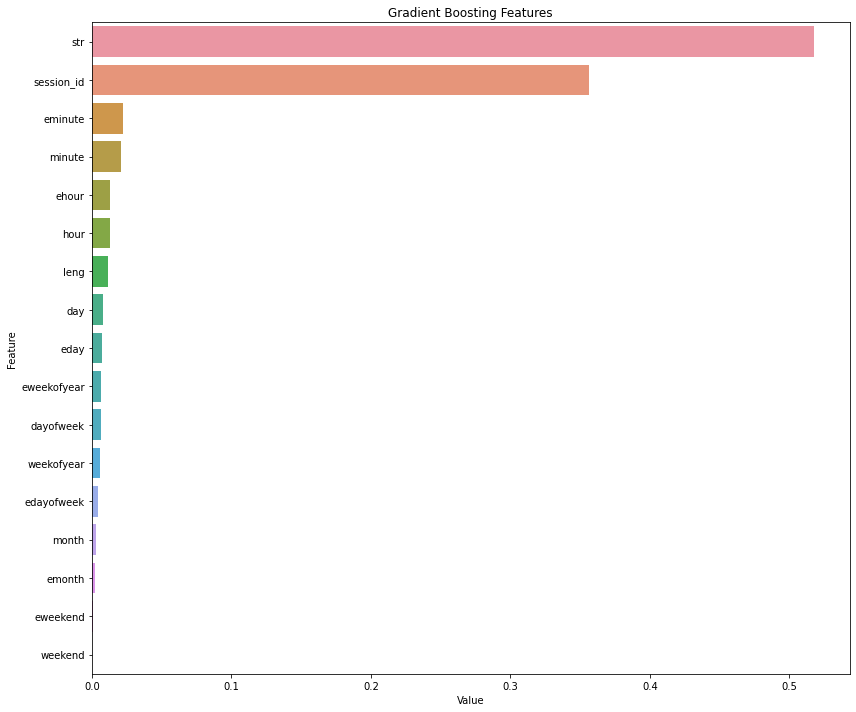

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score, mean_squared_error

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500, random_state=101, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('RMSE', sqrt(mean_squared_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

RMSE 0.2645124011770263
RMSE 0.22769795367459986
RMSE 0.22497621164405193
RMSE 0.24154790974096674
RMSE 0.24970571175265022
RMSE 0.2740910094620984
RMSE 0.2587074618394266
RMSE 0.21891343361983234
RMSE 0.2392382349321957
RMSE 0.24180920315491833
RMSE 0.22973594833386657
RMSE 0.27083809532322356
RMSE 0.2538044431618907
RMSE 0.24722915467523274
RMSE 0.2849966332122961
RMSE 0.2376299506020168
RMSE 0.23843071069261354
RMSE 0.2565896954517072
RMSE 0.2409644337911065
RMSE 0.24653312251681234
RMSE 0.23804019613738614
RMSE 0.26253222054074593
RMSE 0.2641259401482897
RMSE 0.25953780739304977
RMSE 0.26392953069686903
RMSE 0.22234664255453254
RMSE 0.2587748995397963
RMSE 0.2742776752402304
RMSE 0.2381253850313328
RMSE 0.22468189427516722


In [0]:
np.mean(errgb)

0.21891343361983234

In [0]:
cat_final = np.mean(y_pred_totgb,0).round().astype(int)
cat_final

array([0, 0, 0, ..., 1, 1, 0])

In [0]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=cat_final, columns=['gender'])
df_sub.head()

In [0]:
df_sub['gender'].value_counts()

In [0]:
df_sub.to_csv('ensemble.csv', index=False)

In [0]:
from google.colab import files
files.download('ensemble.csv')